<a href="https://colab.research.google.com/github/Chukwugude/Machine-Learning-projects/blob/main/ANN_MNIST_Data(image_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
# Loading the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
#Building the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2965 - accuracy: 0.9138 - val_loss: 0.1508 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1456 - accuracy: 0.9570 - val_loss: 0.1027 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1090 - accuracy: 0.9674 - val_loss: 0.0883 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0893 - accuracy: 0.9725 - val_loss: 0.0828 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.0812 - val_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9794 - val_loss: 0.0707 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.0706 - val_accurac

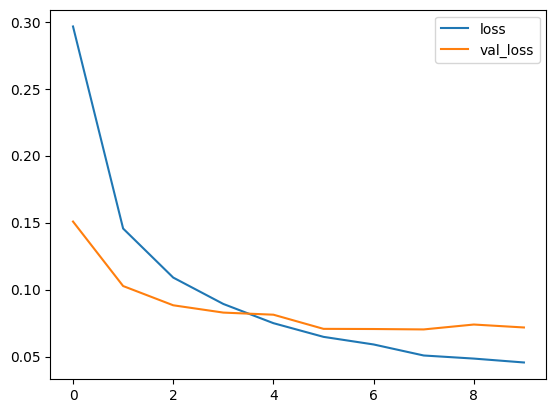

In [ ]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


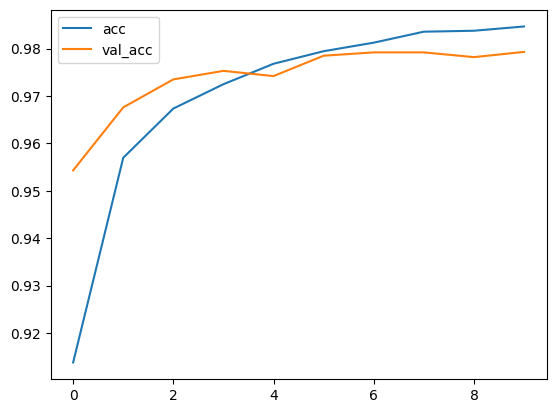

In [ ]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [ ]:
#Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0717 - accuracy: 0.9793
[0.07170791923999786, 0.9793000221252441]


313/313 [==============================] - 3s 7ms/step
Confusion matrix, without normalization
[[ 970    0    2    1    1    1    1    2    2    0]
 [   0 1128    4    0    0    0    1    0    2    0]
 [   4    1 1012    2    1    0    1    8    3    0]
 [   0    1    3  995    0    3    0    4    2    2]
 [   1    0    5    0  959    0    2    0    2   13]
 [   3    0    1   12    1  860    2    2    9    2]
 [   5    3    2    1    3    3  937    0    4    0]
 [   2    5    9    3    1    0    0 1001    0    7]
 [   3    0    6    5    3    2    2    4  944    5]
 [   1    3    0    4    9    2    0    1    2  987]]


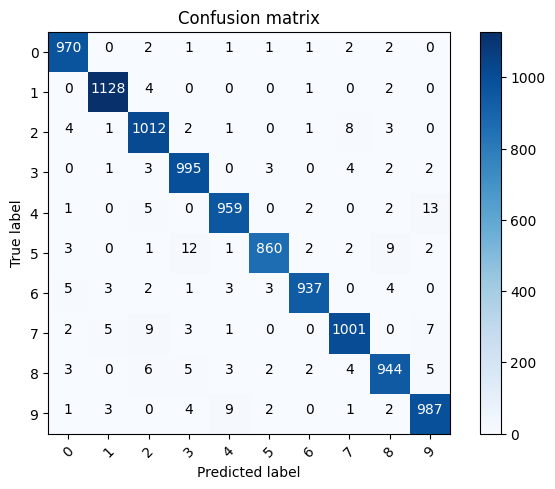

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

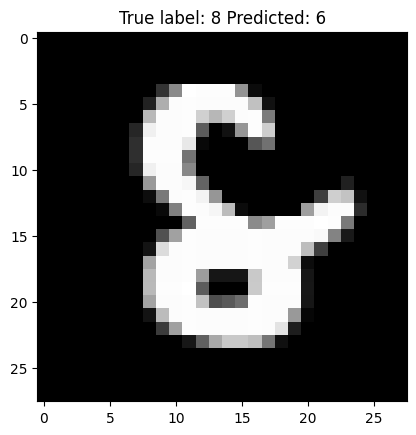

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));